# Soft Computing

## Cvičení 9 - Fuzzy aplikace

### On-site cvičení

https://pythonhosted.org/scikit-fuzzy/auto_examples/index.html

https://github.com/arpit1920/100daysofcode/blob/master/Fuzzy_Logic.ipynb

https://github.com/Apress/deep-neuro-fuzzy-systems-w-python

https://pbpython.com/record-linking.html

https://www.datacamp.com/community/tutorials/fuzzy-string-python

#### 9.1 Scikit-fuzzy

Základní úlohou typu "hello world!" do fuzzy logiky je The tipping problem - problém spropitného. Úloha má dva vstupy a to kvalita obsluhy a jídla a výstupem je hodnota spropitného, která se má dát při placení. Jelikož kvalita je relativní podle osoby a nálady, tak je to ideální problém do fuzzy logiky. Pro vypracování použijeme knihovnu scikit-fuzzy. Úzus je nazývat ji aliasem fuzz.

Scikit-fuzzy se skládá z následujících modulů:
* **fuzz.membership** - modul obsahující membership funkce 
* **fuzz.defuzzify** - modul pro defuzzifikaci výstupní fuzzy množiny na konkrétní (crisp) hodnotu 
* **fuzz.fuzzymath** - modul obsahující operace nad fuzzy množinami (konjukce, disjunkce, rozdíl, ...)
* **fuzz.intervals** - modul pro fuzzy intervalovou matematiku
* **fuzz.image** - modul pro zpracování obrazu pomocí fuzzy operací
* **fuzz.cluster** - modul pro fuzzy k-means clustering algoritmus
* **fuzz.filters** - modul obsahující inference rules řízený filtry

In [ ]:
!python3 -m pip install scikit-fuzzy

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

**Antecedenty (IF)**

Fuzzy proměnné definujeme pomocí antecedentů, jejichž hodnotou je universum. Poté se k nim přiřadí fuzzy množiny pomocí členské funkce nebo se nechají automaticky vygenerovat auto-membership funkcí.

In [29]:
kvalita_jidla = ctrl.Antecedent(np.arange(0, 11, 1), 'kvalita jídla')
kvalita_obsluhy = ctrl.Antecedent(np.arange(0, 11, 1), 'kvalita obsluhy')

# populace fuzzy množiny pomocí Auto-membership funkce (možné hodnoty: 3, 5, 7)
kvalita_jidla.automf(3)
kvalita_obsluhy.automf(3)

**Konsekventy (THEN)**

In [30]:
spropitne = ctrl.Consequent(np.arange(0, 26, 1), 'spropitné')
spropitne['nízké'] = fuzz.trimf(spropitne.universe, [0, 0, 13])
spropitne['střední'] = fuzz.trimf(spropitne.universe, [0, 13, 25])
spropitne['vysoké'] = fuzz.trimf(spropitne.universe, [13, 25, 25])

**Vizualizace fuzzy množin**

/Users/pberanek91/ws/UJEP/KI_PRF_UJEP/soft-computing/venv/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


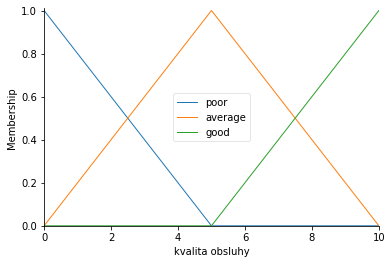

In [31]:
kvalita_obsluhy.view()

/Users/pberanek91/ws/UJEP/KI_PRF_UJEP/soft-computing/venv/lib/python3.9/site-packages/skfuzzy/control/term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


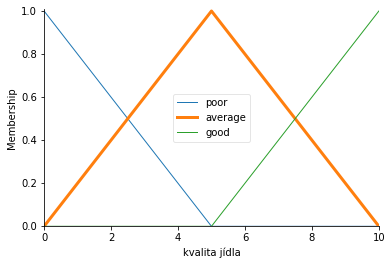

In [32]:
kvalita_jidla['average'].view()

/Users/pberanek91/ws/UJEP/KI_PRF_UJEP/soft-computing/venv/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


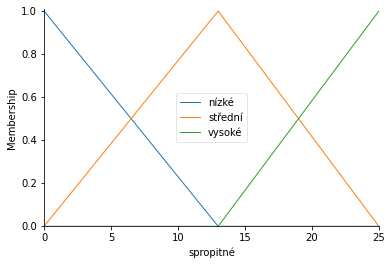

In [33]:
spropitne.view()

**Fuzzy pravidla**

Fuzzy pravidla představují mapování antecedentů na konsekventy. Proměnné, vzniklé automembership funkcí, budou mít již fuzzy množiny přiřazené (poor, average, good, ...).

In [35]:
pravidlo_nizke_spropitne = ctrl.Rule(
    kvalita_jidla['poor'] | kvalita_obsluhy['poor'], 
    spropitne['nízké']
)

pravidlo_stredni_spropitne = ctrl.Rule(
    kvalita_obsluhy['average'], 
    spropitne['střední']
)

pravidlo_vysoke_spropitne = ctrl.Rule(
    kvalita_obsluhy['good'] | kvalita_jidla['good'], 
    spropitne['vysoké']
)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

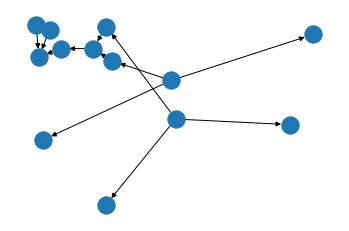

In [36]:
pravidlo_nizke_spropitne.view()

**tvorba řídícího fuzzy systému**

Fuzzy systém představuje kolekci pravidel, které se mají aplikovat při dodání fuzzy proměnné do systému.

In [37]:
ovladac_spropitneho = ctrl.ControlSystem([
    pravidlo_nizke_spropitne,
    pravidlo_stredni_spropitne,
    pravidlo_vysoke_spropitne
])

**fuzzy simulace**

In [38]:
restaurace_u_novaku = ctrl.ControlSystemSimulation(ovladac_spropitneho)

In [39]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
restaurace_u_novaku.input['kvalita jídla'] = 6.5
restaurace_u_novaku.input['kvalita obsluhy'] = 9.8

restaurace_u_novaku.compute()

19.847607361963192


/Users/pberanek91/ws/UJEP/KI_PRF_UJEP/soft-computing/venv/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


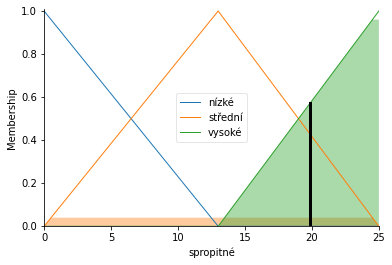

In [41]:
print(restaurace_u_novaku.output['spropitné'])
spropitne.view(sim=restaurace_u_novaku)

### 9.2 Explicitní specifikace v Scikit-fuzzy

**Universa**

In [46]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

kvalita_min = 0
kvalita_max = 10
spropitne_min = 0
spropitne_max = 25

u_kvalita_jidla = np.arange(kvalita_min, kvalita_max+1, 1)
u_kvalita_obsluhy = np.arange(kvalita_min, kvalita_max+1, 1)
u_spropitne  = np.arange(spropitne_min, spropitne_max+1, 1)

**Fuzzy členské proměnné**

In [47]:
kvalita_jidla_nizka = fuzz.trimf(u_kvalita_jidla, [
    kvalita_min, 
    kvalita_min, 
    (kvalita_max-kvalita_min)//2
])
kvalita_jidla_stredni = fuzz.trimf(u_kvalita_jidla, [
    kvalita_min, 
    (kvalita_max-kvalita_min)//2, 
    kvalita_max
])
kvalita_jidla_vysoka = fuzz.trimf(u_kvalita_jidla, [
    (kvalita_max-kvalita_min)//2, 
    kvalita_max,
    kvalita_max
])

kvalita_obsluhy_nizka = fuzz.trimf(u_kvalita_obsluhy, [
    kvalita_min, 
    kvalita_min, 
    (kvalita_max-kvalita_min)//2
])
kvalita_obsluhy_stredni = fuzz.trimf(u_kvalita_obsluhy, [
    kvalita_min, 
    (kvalita_max-kvalita_min)//2,
    kvalita_max
])
kvalita_obsluhy_vysoka = fuzz.trimf(u_kvalita_obsluhy, [
    (kvalita_max-kvalita_min)//2, 
    kvalita_max, 
    kvalita_max
])

spropitne_nizke = fuzz.trimf(u_spropitne, [
    spropitne_min, 
    spropitne_min, 
    (spropitne_max-spropitne_min)//2
])
spropitne_stredni = fuzz.trimf(u_spropitne, [
    spropitne_min, 
    (spropitne_max-spropitne_min)//2, 
    spropitne_max
])
spropitne_vysoke = fuzz.trimf(u_spropitne, [
    (spropitne_max-spropitne_min)//2, 
    spropitne_max, 
    spropitne_max
])

**Vizualizace fuzzy množin**

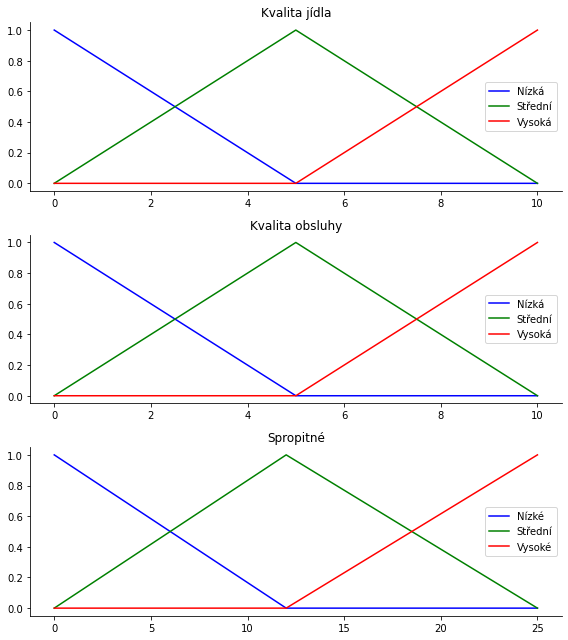

In [48]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(u_kvalita_jidla, kvalita_jidla_nizka, 'b', linewidth=1.5, label='Nízká')
ax0.plot(u_kvalita_jidla, kvalita_jidla_stredni, 'g', linewidth=1.5, label='Střední')
ax0.plot(u_kvalita_jidla, kvalita_jidla_vysoka, 'r', linewidth=1.5, label='Vysoká')
ax0.set_title('Kvalita jídla')
ax0.legend()

ax1.plot(u_kvalita_obsluhy, kvalita_obsluhy_nizka, 'b', linewidth=1.5, label='Nízká')
ax1.plot(u_kvalita_obsluhy, kvalita_obsluhy_stredni, 'g', linewidth=1.5, label='Střední')
ax1.plot(u_kvalita_obsluhy, kvalita_obsluhy_vysoka, 'r', linewidth=1.5, label='Vysoká')
ax1.set_title('Kvalita obsluhy')
ax1.legend()

ax2.plot(u_spropitne, spropitne_nizke, 'b', linewidth=1.5, label='Nízké')
ax2.plot(u_spropitne, spropitne_stredni, 'g', linewidth=1.5, label='Střední')
ax2.plot(u_spropitne, spropitne_vysoke, 'r', linewidth=1.5, label='Vysoké')
ax2.set_title('Spropitné')
ax2.legend()

for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

**Aktivace fuzzy členských funkci nad konkrétní hodnotou**

In [49]:
prislusnost_kvalita_jidla_nizka = fuzz.interp_membership(u_kvalita_jidla, kvalita_jidla_nizka, 6.5)
prislusnost_kvalita_jidla_stredni = fuzz.interp_membership(u_kvalita_jidla, kvalita_jidla_stredni, 6.5)
prislusnost_kvalita_jidla_vysoka = fuzz.interp_membership(u_kvalita_jidla, kvalita_jidla_vysoka, 6.5)

prislusnost_kvalita_obsluhy_nizka = fuzz.interp_membership(u_kvalita_obsluhy, kvalita_obsluhy_nizka, 9.8)
prislusnost_kvalita_obsluhy_stredni = fuzz.interp_membership(u_kvalita_obsluhy, kvalita_obsluhy_stredni, 9.8)
prislusnost_kvalita_obsluhy_vysoka = fuzz.interp_membership(u_kvalita_obsluhy, kvalita_obsluhy_vysoka, 9.8)

**Fuzzy pravidla**

In [51]:
# špatné jídlo nebo špatná obsluha vede k nízkému spropitnému 
pravidlo_nizke_spropitne = np.fmax(prislusnost_kvalita_jidla_nizka, prislusnost_kvalita_obsluhy_nizka)
aktivace_nizke_spropitne = np.fmin(pravidlo_nizke_spropitne, spropitne_nizke)

# průměrná obsluha vede k průměrnému spropitnému
aktivace_stredni_spropitne = np.fmin(prislusnost_kvalita_obsluhy_stredni, spropitne_stredni)

# vysoká kvalita obsluhy nebo vysoká kvalita jídla vede na vysoké spropitné
pravidlo_vysoke_spropitne = np.fmax(prislusnost_kvalita_jidla_vysoka, prislusnost_kvalita_obsluhy_vysoka)
aktivace_vysoke_spropitne = np.fmin(pravidlo_vysoke_spropitne, spropitne_vysoke)

**Vizualizace rozhodování**

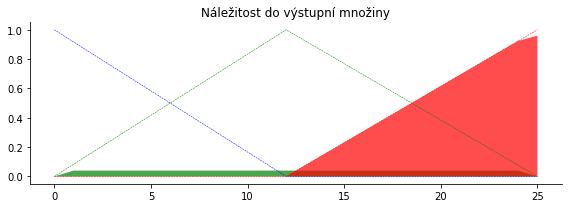

In [53]:
spropitne_0 = np.zeros_like(u_spropitne)
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(u_spropitne, spropitne_0, aktivace_nizke_spropitne, facecolor='b', alpha=0.7)
ax0.plot(u_spropitne, spropitne_nizke, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(u_spropitne, spropitne_0, aktivace_stredni_spropitne, facecolor='g', alpha=0.7)
ax0.plot(u_spropitne, spropitne_stredni, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(u_spropitne, spropitne_0, aktivace_vysoke_spropitne, facecolor='r', alpha=0.7)
ax0.plot(u_spropitne, spropitne_vysoke, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Náležitost do výstupní množiny')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

**Defuzzifikace**

In [55]:
agregace_vystupnich_fuzzy_mnozin = np.fmax(
    aktivace_nizke_spropitne, 
    np.fmax(aktivace_stredni_spropitne, aktivace_vysoke_spropitne)
)

spropitne = fuzz.defuzz(
    u_spropitne, 
    agregace_vystupnich_fuzzy_mnozin, 
    'centroid', # vrací hmotný střed fuzzy množiny na ose x
    # bisector, # dělí fuzzy množinu na dvě oblasti se stejným obsahem
    # som,      # smallest of maximum, vrací první bod na ose x, kde se nachází maximum
    # mom,      # middle of maximum, vrací prostřední bod na ose x, kde se nachází maximum
    # lom,      # largest of maximum, vrací poslední bod na ose x, kde se nachází maximum
)

print("Spropitne = ", spropitne)

Spropitne =  19.67816091954024


**Vizualizace defuzzifikace**

In [ ]:
aktivace_spropitne = fuzz.interp_membership(u_spropitne, agregace_vystupnich_fuzzy_mnozin, spropitne)

fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.plot(u_spropitne, spropitne_nizke, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(u_spropitne, spropitne_stredni, 'g', linewidth=0.5, linestyle='--')
ax0.plot(u_spropitne, spropitne_vysoke, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(u_spropitne, spropitne_0, agregace_vystupnich_fuzzy_mnozin, facecolor='Orange', alpha=0.7)
ax0.plot([spropitne, spropitne], [0, aktivace_spropitne], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Agregované členství a výstupní hodnota')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

### 9.3 Pokročilé řídící systémy

Fuzzy logika se využívá ve složitých regulátorech, jejichž cílem je udržovat hodnotu proměnné poblíž žádané hodnoty. Regulátory mají k dispozici většinou 2 hodnoty - deviaci (chyba) od ideální hodnoty a derivaci deviace v čase (delta) a výstupem je akční veličina, která nějakým způsobem zasahuje do systému za účelem zmenšení deviace a derivace deviace (například pohyb aktuátoru, redukce paliva, aj.).

**Nastavení fuzzy systému**

In [57]:
import numpy as np
import skfuzzy.control as ctrl

#předpoklad - deviace a derivace deviace mají obě stejné universum možných hodnot
universe = np.linspace(-2, 2, 5)

error = ctrl.Antecedent(universe, 'error')
delta = ctrl.Antecedent(universe, 'delta')
output = ctrl.Consequent(universe, 'output')

#v teorii kybernetiky je úzus následujících zkratek pro fuzzy množiny
# nb = negative big 
# ns = negative small
# ze = zero
# ps = positive small
# pb = positive big
names = ['nb', 'ns', 'ze', 'ps', 'pb']
error.automf(names=names)
delta.automf(names=names)
output.automf(names=names)

**Definice pravidel**

Pravidla zde vytvoříme zcela obecně, avšak v reálném prostředí by konsekventy mohly být např.: doba spuštění motoru, pohyb doleva/doprava, přidání malého nebo velkého množství paliva.

In [58]:
#pokud je deviace a její derivace v součtu velká a záporná
rule0 = ctrl.Rule(antecedent=((error['nb'] & delta['nb']) |
                              (error['ns'] & delta['nb']) |
                              (error['nb'] & delta['ns'])),
                  consequent=output['nb'], label='rule nb')

#pokud je deviace a její derivace v součtu střední a záporná
rule1 = ctrl.Rule(antecedent=((error['nb'] & delta['ze']) |
                              (error['nb'] & delta['ps']) |
                              (error['ns'] & delta['ns']) |
                              (error['ns'] & delta['ze']) |
                              (error['ze'] & delta['ns']) |
                              (error['ze'] & delta['nb']) |
                              (error['ps'] & delta['nb'])),
                  consequent=output['ns'], label='rule ns')

#pokud je deviace a její derivace v součtu nulová
rule2 = ctrl.Rule(antecedent=((error['nb'] & delta['pb']) |
                              (error['ns'] & delta['ps']) |
                              (error['ze'] & delta['ze']) |
                              (error['ps'] & delta['ns']) |
                              (error['pb'] & delta['nb'])),
                  consequent=output['ze'], label='rule ze')

#pokud je deviace a její derivace v součtu střední a kladná
rule3 = ctrl.Rule(antecedent=((error['ns'] & delta['pb']) |
                              (error['ze'] & delta['pb']) |
                              (error['ze'] & delta['ps']) |
                              (error['ps'] & delta['ps']) |
                              (error['ps'] & delta['ze']) |
                              (error['pb'] & delta['ze']) |
                              (error['pb'] & delta['ns'])),
                  consequent=output['ps'], label='rule ps')

#pokud je deviace a její derivace v součtu velká a kladná
rule4 = ctrl.Rule(antecedent=((error['ps'] & delta['pb']) |
                              (error['pb'] & delta['pb']) |
                              (error['pb'] & delta['ps'])),
                  consequent=output['pb'], label='rule pb')

In [59]:
system = ctrl.ControlSystem(rules=[rule0, rule1, rule2, rule3, rule4])

#chceme zadat naráz celkem 21*21 hodnot, po kterých výsledky resetujeme
sim = ctrl.ControlSystemSimulation(system, flush_after_run=21 * 21 + 1)

**Vizualizace řídícího prostoru**

Řídící prostor je tvořen z plochy možných hodnot proměnných (vstupy), na základě kterých dochází k regulaci (pomocí výstupu), který představuje výšku k ploše.

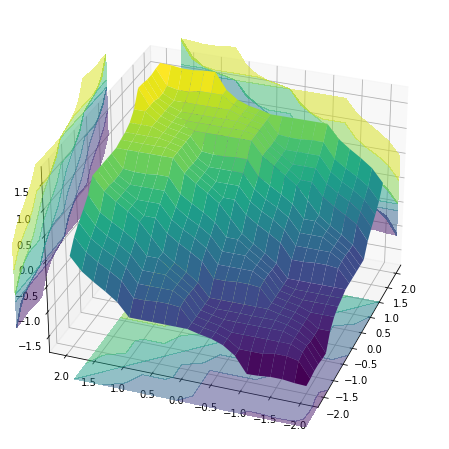

In [61]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#vytvareni kontrolniho povrchu, ke kteremu budeme pocitat vysku, x = deviace, y = derivace deviace
prostor_vstupu = np.linspace(-2, 2, 21)
x, y = np.meshgrid(prostor_vstupu, prostor_vstupu)
z = np.zeros_like(x)

# cyklus pro vzorkovani kontrolního povrchu
for i in range(21):
    for j in range(21):
        sim.input['error'] = x[i, j]
        sim.input['delta'] = y[i, j]
        sim.compute()
        z[i, j] = sim.output['output']

#vykresleni kontrolniho povrchu a vystupnim hodnotam regulatoru
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=0.4, antialiased=True)
cset = ax.contourf(x, y, z, zdir='z', offset=-2.5, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset=3, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset=3, cmap='viridis', alpha=0.5)
ax.view_init(30, 200)

### 9.4 Fuzzy shlukování

Algoritmus k-means přiřazuje bod ke shluku podle jeho vzdálenosti od shluku s pevně danou příslušností. Shlukovat jde i pomocí fuzzy množin, které prak přiřazují body ke klastrům se stupněm příslušnosti. Velice užitečnou informací z této problematiky je koeficient FPC (Fuzzy Partition Coefficient), který říká, jak moc čistě jsou naše data klasifikována modelem. Lze ho využít pro nalezení optimálního počtu klastrů.

**Generování shluků**

Text(0.5, 1.0, 'Testovací data: 200 bodu ve 3 shlucích.')

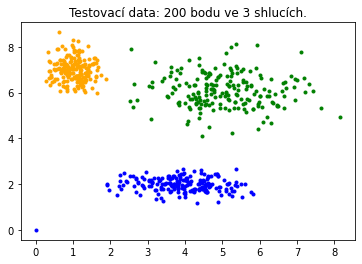

In [66]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

barvy_shluku = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

centra_shluku = [
    [4, 2],
    [1, 7],
    [5, 6]
]

rozptyly_center = [
    [0.8, 0.3],
    [0.3, 0.5],
    [1.1, 0.7]
]

#generování shluků
x_souradnice = np.zeros(1)
y_souradnice = np.zeros(1)
znacky = np.zeros(1)
for i, ((x_centrum, y_centrum), (x_rozptyl, y_rozptyl)) in enumerate(zip(centra_shluku, rozptyly_center)):
    x_souradnice = np.hstack((x_souradnice, x_centrum + np.random.standard_normal(200) * x_rozptyl))
    y_souradnice = np.hstack((y_souradnice, y_centrum + np.random.standard_normal(200) * y_rozptyl))
    znacky = np.hstack((znacky, np.ones(200) * i))

#vizualizace shluků
fig0, ax0 = plt.subplots()
for i_znacka in range(3):
    ax0.plot(x_souradnice[znacky == i_znacka], y_souradnice[znacky == i_znacka], '.',
             color=barvy_shluku[i_znacka])
ax0.set_title('Testovací data: 200 bodu ve 3 shlucích.')

**Fuzzy Shlukování**

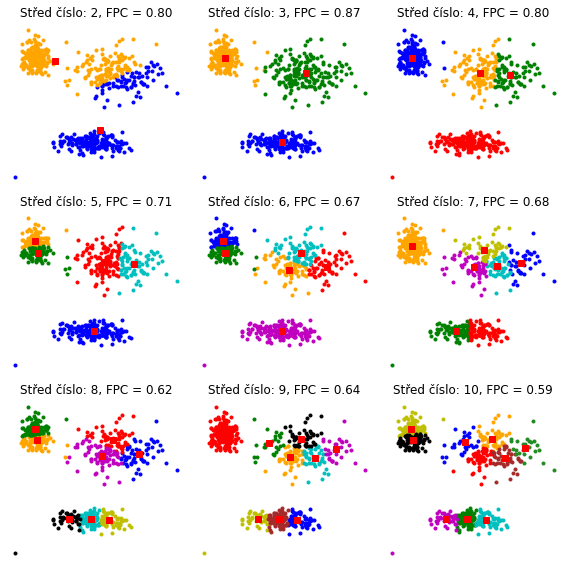

In [69]:
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
souradnice_bodu = np.vstack((x_souradnice, y_souradnice))

#koeficienty FPC pro počty shluků - zde je síla fuzzy shlukování
fpcs = []

for pocet_center, ax in enumerate(axes1.reshape(-1), 2):

    #fuzzy.cluster.cmeans vrátí spousty užitečných hodnot o daném centru shluku
    # cntr = 
    # u    = 
    # u0   = 
    # d    = 
    # jm   = 
    # p    = 
    # fpc  = 
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        souradnice_bodu, 
        pocet_center, 
        2, 
        error=0.005, 
        maxiter=1000, 
        init=None
    )
    fpcs.append(fpc)

    #přiřazení bodů do shluku podle parametru u, který představuje
    prislusnost_k_shluku = np.argmax(u, axis=0)
    for j in range(pocet_center):
        ax.plot(x_souradnice[prislusnost_k_shluku == j],
                y_souradnice[prislusnost_k_shluku == j], 
                '.', color=barvy_shluku[j])

    #vyznačení centra shluku
    for souradnice_centra in cntr:
        ax.plot(souradnice_centra[0], souradnice_centra[1], 'rs')

    ax.set_title('Střed číslo: {0}, FPC = {1:.2f}'.format(pocet_center, fpc))
    ax.axis('off')

fig1.tight_layout()

**Koeficient FPC**

Z křivky hodnoty FPC pro daný počet center je možné zjistit optimální počet center, který se má zvolit pro klasifikaci pro minimalizaci entropie.

Text(0, 0.5, 'FPC (Fuzzy partition coefficient)')

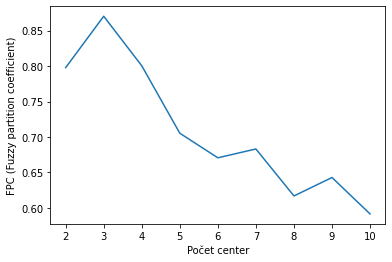

In [71]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Počet center")
ax2.set_ylabel("FPC (Fuzzy partition coefficient)")

**Klasifikace neznámých dat**

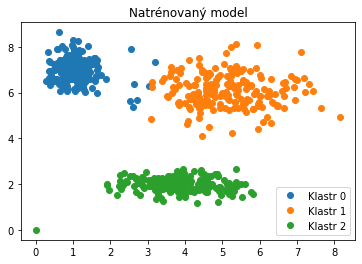

In [72]:
# v tomto případě dopadl nejlépe model se třemi centery, tak si ho zvolíme
cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(
    souradnice_bodu, 
    3, 
    2, 
    error=0.005, 
    maxiter=1000
)

# vizualizace tří-klastrového modelu
fig2, ax2 = plt.subplots()
ax2.set_title('Natrénovaný model')
for icentrum in range(3):
    ax2.plot(souradnice_bodu[0, u_orig.argmax(axis=0) == icentrum],
             souradnice_bodu[1, u_orig.argmax(axis=0) == icentrum], 'o',
             label='Klastr ' + str(icentrum))
ax2.legend()

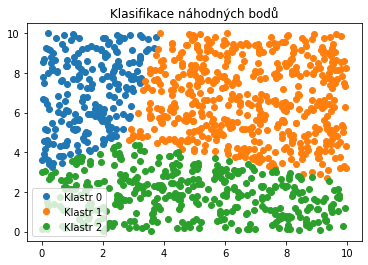

In [75]:
# generuj testovací data rovnoměrně rozmístěné v rozsahu [0, 10] na souřadnici x a y
newdata = np.random.uniform(0, 1, (1100, 2)) * 10

# predikuj nové členství do shluku a střed 3-shlukového modelu
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
    newdata.T, 
    cntr, 
    2, 
    error=0.005, 
    maxiter=1000
)

# proveď defuzzifikaci náležitosti do tříd
cluster_membership = np.argmax(u, axis=0)

# vykresli klasifikovaná data s pevně danými (non-fuzzy) třídami
fig3, ax3 = plt.subplots()
ax3.set_title('Klasifikace náhodných bodů')
for icentrum in range(3):
    ax3.plot(newdata[cluster_membership == icentrum, 0],
             newdata[cluster_membership == icentrum, 1], 'o',
             label='Klastr ' + str(icentrum))
ax3.legend()

plt.show()

### 9.5 Fuzzy zpracování obrazu

Námět na diplomovou práci: 
* https://www.researchgate.net/publication/281354605_Fuzzy_Image_Processing
* https://imageprocessingplace.com/downloads_V3/root_downloads/tutorials/fuzzy_image_processing.pdf
* https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.image.html



### 9.6 Neuro-fuzzy

Námět na diplomovou práci:
* https://arxiv.org/pdf/2001.01686v1.pdf
* https://www.koreascience.or.kr/article/JAKO202025356104190.pdf
* http://ceur-ws.org/Vol-3074/paper14.pdf
* https://github.com/Apress/deep-neuro-fuzzy-systems-w-python